.

<div style="text-align: center;">
    <img src="https://i.imgur.com/zTLujrk.png" alt="JPierre-DATA ANALIST" 
         style="width:300px; float: right; margin: 30px 10px;"></img>
	<div style=""><p style="font-weight: bold; font-size: 26px; color: #444654; 
      float:  left; margin: 50px 30px;">Most Profitable Neighborhoods For AirBnb</p>
	</div>
</div>

<img src="https://i.imgur.com/4gX5WFr.png" alt="JPierre-DATA ANALIST"></img>

# ANÁLISIS INICIAL DE FICHEROS Y PREPARACIÓN DEL CASO

Usaremos datos reales ofrecidos por AirBnB en esta página: http://insideairbnb.com/get-the-data.html

* Quedarnos sólo con las tablas que nos vayan a resultar útiles
* Cargar toda la info a una base de datos para practicar con este formato, ya que será el más habitual en entornos empresariales


## SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
import sqlalchemy as sa
from sqlalchemy import inspect
import folium


#Automcompletar rápido
%config IPCompleter.greedy=True

## ENTENDER LOS FICHEROS

En la web de AirBnB podemos ver la descripción de las tablas:

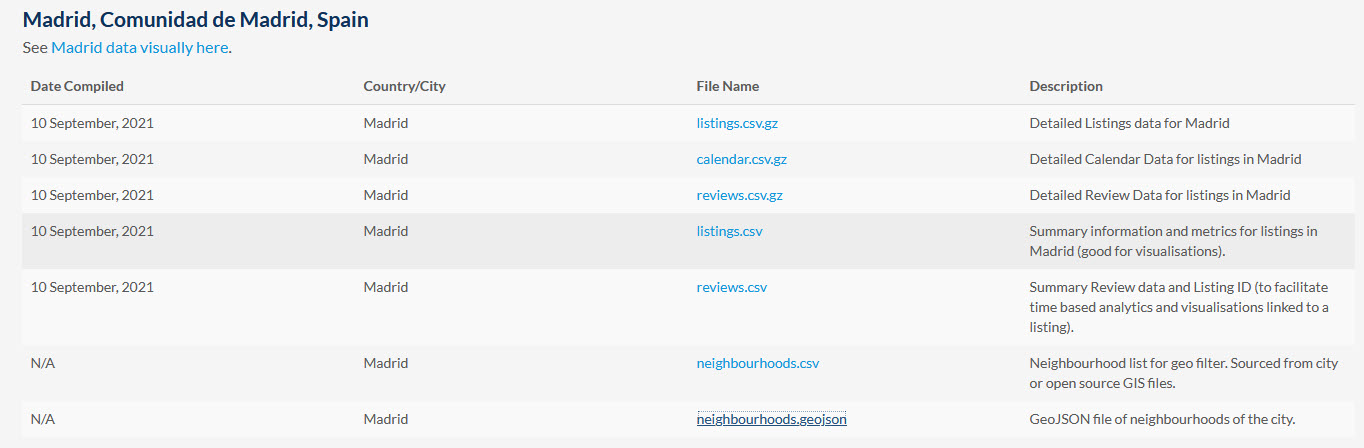

In [2]:
display.Image("../../../99_Media/airbnb_ficheros.jpg")

### Cargamos y entendemos listings agregados

In [3]:
listings = pd.read_csv('../Datos/listings.csv')

In [4]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.21,2,180,4,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.39,2,364,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,5,222,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2018-05-15,1.65,1,349,0,NaN


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   host_name                       18883 non-null  object 
 4   neighbourhood_group             18909 non-null  object 
 5   neighbourhood                   18909 non-null  object 
 6   latitude                        18909 non-null  float64
 7   longitude                       18909 non-null  float64
 8   room_type                       18909 non-null  object 
 9   price                           18909 non-null  int64  
 10  minimum_nights                  18909 non-null  int64  
 11  number_of_reviews               18909 non-null  int64  
 12  last_review                     

### Cargamos y entendemos listings detalle

In [6]:
listings_det = pd.read_csv('../Datos/listings.csv.gz',compression='gzip')

In [7]:
listings_det.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,4.89,4.77,4.85,NaN,f,2,0,2,0,1.21
1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.39
2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,5,4,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.51
4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,4.71,4.70,4.72,NaN,f,1,0,1,0,1.65


In [8]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18909 non-null  int64  
 1   listing_url                                   18909 non-null  object 
 2   scrape_id                                     18909 non-null  int64  
 3   last_scraped                                  18909 non-null  object 
 4   name                                          18906 non-null  object 
 5   description                                   17854 non-null  object 
 6   neighborhood_overview                         10997 non-null  object 
 7   picture_url                                   18908 non-null  object 
 8   host_id                                       18909 non-null  int64  
 9   host_url                                      18909 non-null 

Conclusiones: 

* Son los mismos registros pero el fichero de detalle tiene más columnas.
* Podríamos unirlas mediante el campo id

### Conclusiones del análisis de ficheros

* Tablas principales que usaremos:
    * listings.csv
    * listings.csv.gz

## CREACIÓN DE UNA BASE DE DATOS

Creamos la conexión:

In [9]:
con = sa.create_engine('sqlite:///../Datos/datos_2/airbnb.db')

Creamos las tablas y cargamos los datos

In [10]:
listings.to_sql('listings_2', con = con, if_exists = 'replace')
listings_det.to_sql('listings_det_2', con = con, if_exists = 'replace')

18909

<img src="https://i.imgur.com/4gX5WFr.png" alt="JPierre-DATA ANALIST"></img>

# CREACIÓN DEL DATAMART ANALÍTICO

In [11]:
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['df',
 'df_preparado',
 'listings',
 'listings_2',
 'listings_det',
 'listings_det_2']

In [12]:
#carga de las tablas que vamos a usar
listings = pd.read_sql('listings_2', con)
listings_det = pd.read_sql('listings_det_2', con)

### Datos Externos

En esta página tenemos justo la info que necesitamos para crear la tabla de precios de venta: https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/

In [13]:
#Cargamos los datos, quitamos el primer registro y seleccionamos solo las columnas de precio y distrito

precio_m2 = pd.read_csv('../Datos/idealista.csv') \
    .loc[1:,['table__cell','icon-elbow']] \
    .rename(columns = {'table__cell':'precio_m2','icon-elbow':'distrito'})
precio_m2

,precio_m2,distrito
1,4.085 €/m2,Arganzuela
2,3.409 €/m2,Barajas
3,2.123 €/m2,Carabanchel
4,4.827 €/m2,Centro
5,5.098 €/m2,Chamartín
6,5.381 €/m2,Chamberí
7,2.940 €/m2,Ciudad Lineal
8,3.568 €/m2,Fuencarral
9,3.871 €/m2,Hortaleza
10,2.267 €/m2,Latina


Limpiamos el precio:
    
1. quitando la unidad
2. quitando los puntos de separador de miles
3. cambiando el tipo a entero

In [14]:
precio_m2['precio_m2'] = precio_m2.precio_m2.str.split(expand = True)[0].str.replace('.','',regex=False).astype('int')
precio_m2

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral
9,3871,Hortaleza
10,2267,Latina


En esta sección se crea el datamart luego de un proceso de limpieza de datos. Se unifica todo en una tabla de a base de datos para mayor eficiencia.

In [15]:
#creacion de conexion y carga de la tabla df

con = sa.create_engine('sqlite:///../Datos/datos_2/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,...,Chamartín,60.0,50,01_Una,0-3,1,49-744,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,...,Latina,31.0,0,01_Una,0-3,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,...,Arganzuela,50.0,39,03_Tres,5-16,3-23,0-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,...,Centro,92.0,68,01_Una,0-3,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,...,Arganzuela,26.0,4,01_Una,0-3,1,49-744,50,142975.0,3.200942


In [16]:
#Generacion de un minicubo para nuestros analisis.

In [17]:

#Minicubo:

metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]

minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')

<img src="https://i.imgur.com/4gX5WFr.png" alt="JPierre-DATA ANALIST"></img>

# CONCLUSIONES EJECUTIVAS

* Se han localizado 10 barrios en los que centrar la búsqueda
* Se recomienda buscar inmuebles con un habitación que permitan alojar 3 huéspedes
* Se recomienda buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés
* Se recomienda evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo, especialmente en el barrio de San Blas

## DETALLE DE LOS PRINCIPALES RESULTADOS

### Existen 10 barrios con alto potencial de inversión

* Se han localizado 10 barrios que apriori pueden maximizar la relación coste-ingresos
* Además podemos segmentarlos por el tipo calidad del inmueble en el que nos interes invertir en 4 grandes grupos
* Estos son los 10 barrios donde comenzar a buscar oportunidades concretas:
    * Inversión baja: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Inversión media: El Plantio, Valdemarín, Valdefuentes
    * Inversión media-alta: Jerónimos, Fuentela reina
    * Inversión alta: Recoletos

Exhibit 1.4.1

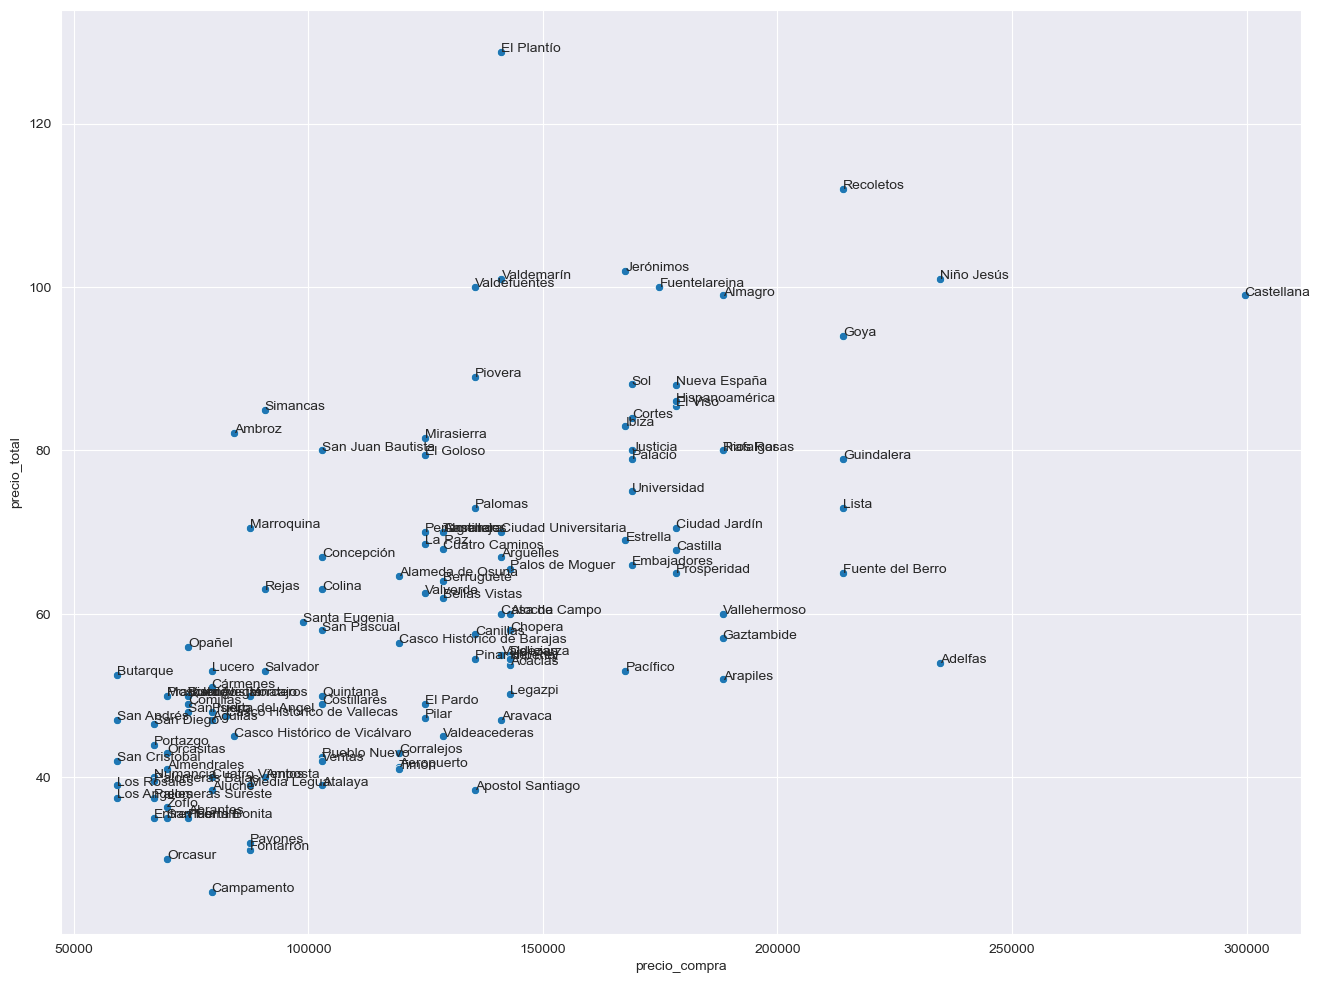

In [18]:
no_incluir = ['Rosas','Arcos','Canillejas','Hellín']

temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()

temp = temp[~temp.index.isin(no_incluir)]

plt.figure(figsize = (16,12))
sns.set_style('darkgrid')
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

### Buscar inmuebles de una habitación que permitan 3 huéspedes

* El número de huéspedes que maximiza el precio de compra pagado es de 3

Exhibit 1.4.2

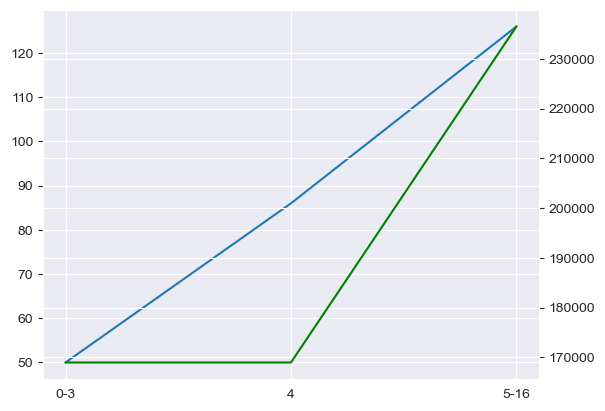

In [19]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

### Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés

* Previsiblemente tendrán menor precio de compra
* Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler

Exhibit 1.4.3

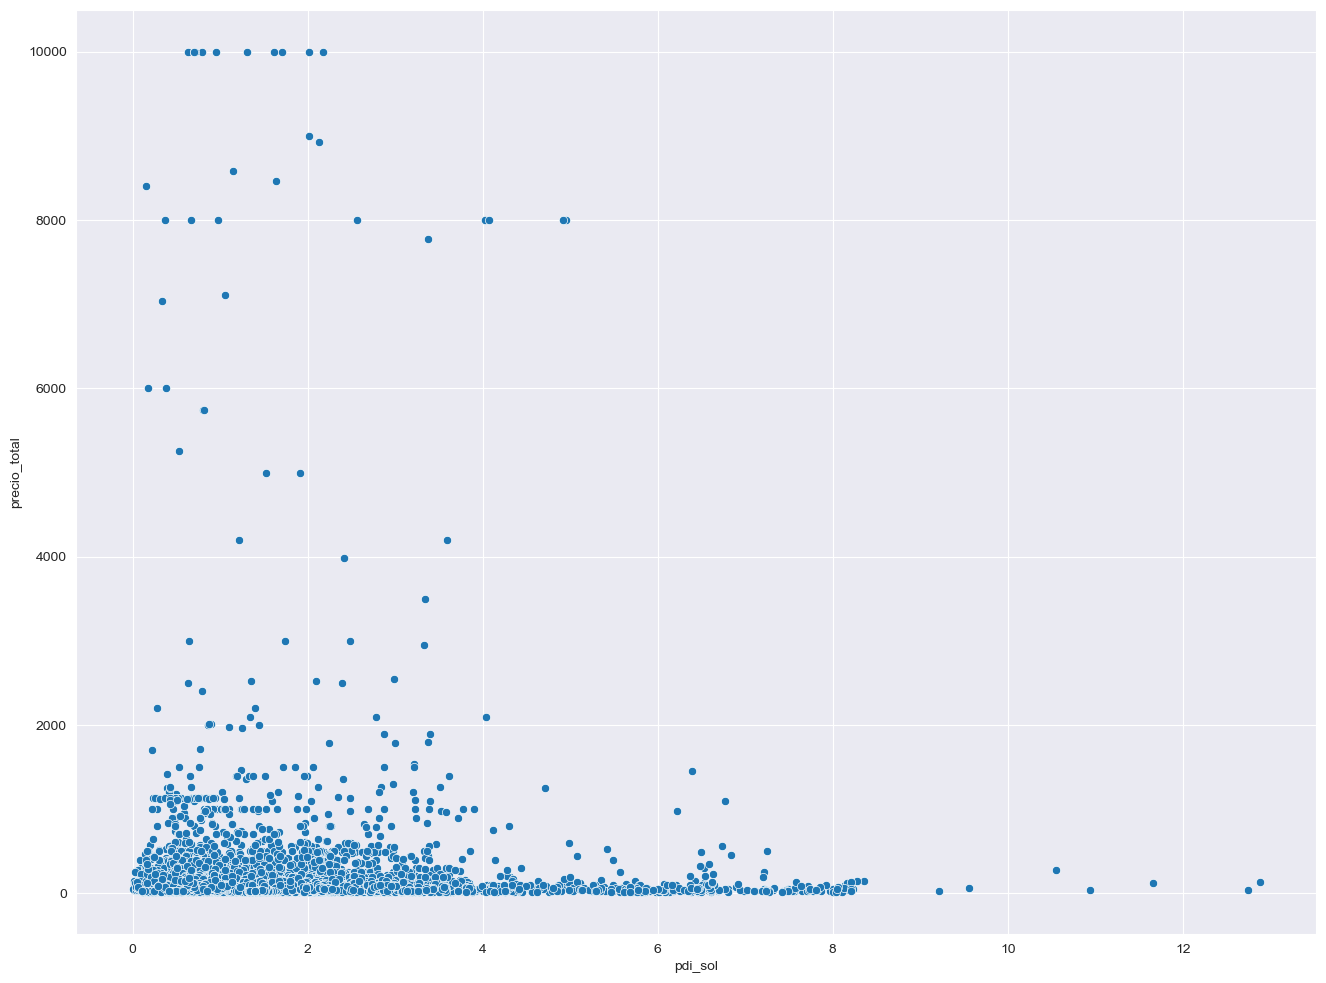

In [20]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

### Evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo

* Buscar oportunidades en el barrio de San Blas
* Todavía existen muchos alquileres que no están explotando este potencial

Exhibit 1.4.4

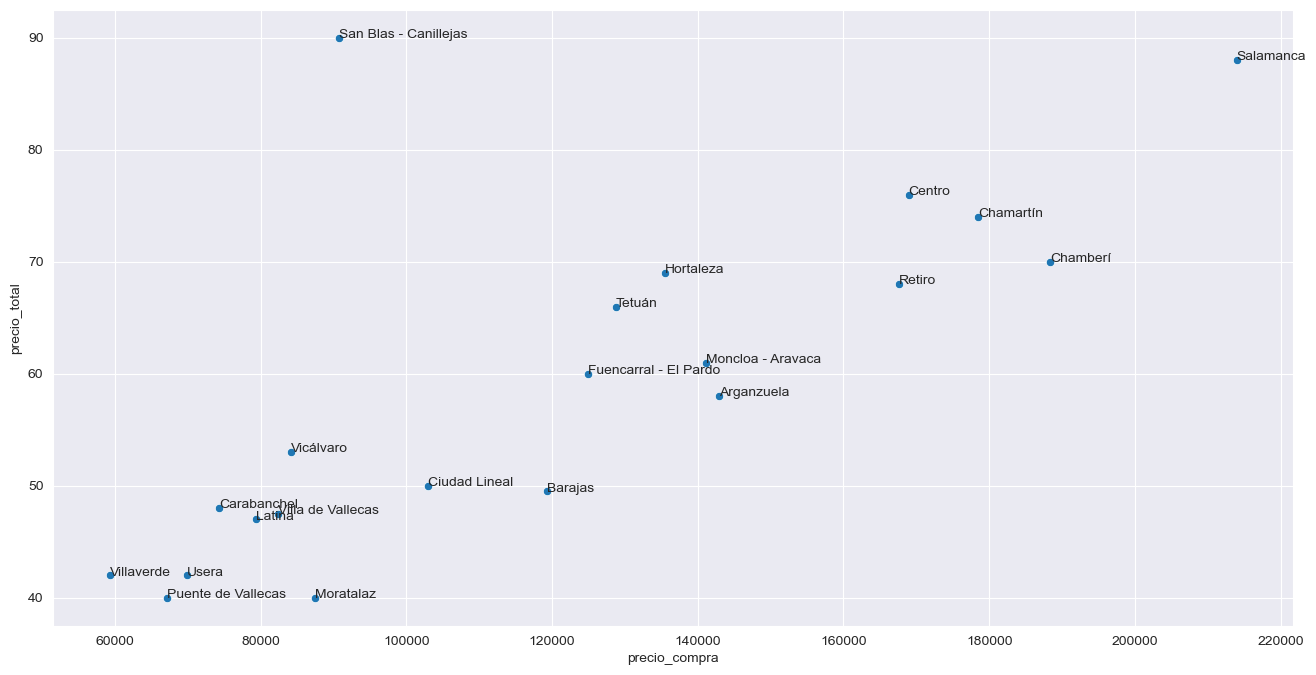

In [21]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()

plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

Exhibit 1.4.5

In [22]:
datos = df[df.distrito == 'San Blas - Canillejas'].copy()

datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

mapa = folium.Map(location=[datos.iloc[0,7], datos.iloc[0,8]],zoom_start=14)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

<div style="text-align: center; background: linear-gradient(to right, #8E44AD, #3498DB); padding: 10px;">
    <a href="https://github.com/JUANDAX1" style="color: #fff; text-decoration: none; font-size: 18px;">
        Visita mi perfil en GitHub ➡️
    </a>
</div>
